# 빅데이터실습 기말대체프로젝트 YA_20180710_이수민
## <교통사고현황 데이터 분석>

# 설명링크 = https://youtu.be/HpnXgW9pd1I

In [8]:
import pandas as pd
import numpy as np
import matplotlib
from pandas import Series, DataFrame
import matplotlib.pyplot as plt


# 0. 엑셀 파일 가져오기

In [9]:
#taas = 
pd.read_excel(r'C:/Users/Leesumin/3D Objects/Downloads/교통사고현황.xlsx')
#taas

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Leesumin/3D Objects/Downloads/교통사고현황.xlsx'

# 1. 년도별 전체 사고 건수 출력

In [275]:
t_사고건수 =  taas.loc[taas['유형'] == '사고건수']
t_사고건수 = t_사고건수.filter(['구분',2016,2017,2018,2019,2020])
t_사고건수 = t_사고건수.loc[t_사고건수['구분'] == '전체사고']
t_사고건수
t_사고건수 = t_사고건수.transpose()
t_사고건수.rename(columns = t_사고건수.iloc[0], inplace = True)
t_사고건수
t_사고건수 =t_사고건수.drop(t_사고건수.index[0])
t_사고건수

,전체사고
2016,220917
2017,216335
2018,217148
2019,229600
2020,209654


# 1-1. 년도별 전체 사고 건수 추이

In [276]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:title={'center':'년도별 전체 사고 건수 추이'}, xlabel='년도', ylabel='사고 건수'>

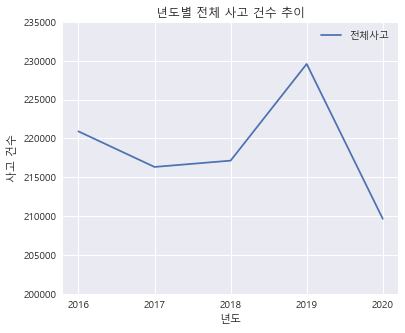

In [277]:
#plt.style.use('seaborn')

t_사고건수.plot(title = '년도별 전체 사고 건수 추이',xticks = [2016,2017,2018,2019,2020], ylim = [200000,235000], xlabel = '년도',ylabel = '사고 건수',figsize = (6,5))


# 2. 2020년 사고건수 높은 순서대로 출력(전체사고 제외)

In [1]:
사고건수_2020 = taas.loc[taas['유형'] == '사고건수']
사고건수_2020 = 사고건수_2020.filter(['구분',2020])
사고건수_2020 =사고건수_2020.drop(index=0, axis = 0) #0번 열 삭제
사고건수_2020['순위'] = 사고건수_2020[2020].rank(ascending = False)
사고건수_2020['순위'] = 사고건수_2020.iloc[0:]['순위'].astype(int)
사고건수_2020.set_index('순위',inplace = True)
사고건수_2020 = 사고건수_2020.sort_values(by = '순위')
사고건수_2020


NameError: name 'taas' is not defined


## 3. 2016년 사업용자동차사고보다 높은 사망자수 출력


In [291]:
사망자수 = taas.loc[taas['유형'] == '사망자']
df_사망자수 = 사망자수.iloc[7][2016]
df_사망자수 = 사망자수[사망자수[2016] >= df_사망자수]
df_사망자수.set_index('구분',inplace = True) #숫자 인덱스 지우기
df_사망자수


,유형,2016,2017,2018,2019,2020
구분,,,,,,
전체사고,사망자,4292,4185,3781,3349,3081
사망사고,사망자,4292,4185,3781,3349,3081
노인사고,사망자,1732,1767,1682,1523,1342
보행자사고,사망자,1714,1675,1487,1302,1093
사업용자동차사고,사망자,853,821,748,633,575


# 4. 년도별 부상자,사고건수,사망자의 최대값

In [70]:
taas.pivot_table(index = "유형" ,values = [2016,2017,2018,2019,2020], aggfunc = 'max')

,2016,2017,2018,2019,2020
유형,,,,,
부상자,331720,322829,323037,341712,306194
사고건수,220917,216335,217148,229600,209654
사망자,4292,4185,3781,3349,3081


# 5. 유형의 사고건수 합계 출력
## 5-1. 데이터 추출

In [71]:
taas.groupby('유형').get_group('사고건수')

,구분,유형,2016,2017,2018,2019,2020
0,전체사고,사고건수,220917,216335,217148,229600,209654
3,사망사고,사고건수,4119,4065,3657,3233,2983
6,어린이사고,사고건수,11264,10960,10009,11054,8400
9,노인사고,사고건수,35761,37555,38647,40645,35312
12,보행자사고,사고건수,49235,47377,45921,46682,36601
15,자전거사고,사고건수,5936,5659,4771,5633,5667
18,이륜차사고,사고건수,13076,13730,15032,18467,18280
21,사업용자동차사고,사고건수,49041,44784,45122,47179,40108
24,음주운전사고,사고건수,19769,19517,19381,15708,17247


## 5-2 사고건수의 사고별, 년도별 합계 출력 후 데이터프레임에 추가하기

In [ ]:
df_사고건수= taas.groupby('유형').get_group('사고건수')
df_사고건수 = df_사고건수[['구분',2016,2017,2018,2019,2020]]
df_사고건수['사고별 합계'] = df_사고건수.sum(axis = 1)
df_사고건수
#df_사고건수.loc['년도별합계'] = 
df_사고건수 = df_사고건수.append(df_사고건수.sum(numeric_only = True), ignore_index = True)#합계행추가
#df_사고건수.set_index('구분',inplace = True)

#df_사고건수.astype(int)

df_사고건수.set_index('구분',inplace = True)
#df_사고건수 =
df_사고건수
df_사고건수.replace(np.nan,'년도별합계')

# 6. 보행자사고의 부상자 수와 이륜차사고의 사고건수 시각화

In [1]:
보행자 = taas[taas['구분'] == '보행자사고']
보행자 = 보행자.filter(['유형',2016,2017,2018,2019,2020])
보행자 = 보행자[보행자['유형'] == '부상자']
보행자 =보행자.transpose()
보행자.rename(columns = 보행자.iloc[0], inplace = True)
보행자 = 보행자.drop(보행자.index[0])
   
이륜차 = taas[taas['구분'] == '이륜차사고']
이륜차 = 이륜차.filter(['유형',2016,2017,2018,2019,2020])
이륜차 = 이륜차[이륜차['유형'] == '사고건수']
이륜차 = 이륜차.transpose()
이륜차.rename(columns = 이륜차.iloc[0], inplace = True)
이륜차 = 이륜차.drop(이륜차.index[0])
이륜차
#보행자

NameError: name 'taas' is not defined

## 6-1. 데이터 합치기

In [111]:
data = pd.concat([보행자,이륜차],axis = 1)
data

,부상자,사고건수
2016,49725,13076
2017,47707,13730
2018,46400,15032
2019,47200,18467
2020,36939,18280


## 6-2. 보행자의 사망수와 이륜차의 사고건수 시각화

In [8]:
data.plot(title = ' 보행자사고의 부상자 수와 이륜차사고의 사고건수 분석',xticks = [2016,2017,2018,2019,2020],figsize = (5,3))

NameError: name 'data' is not defined